<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Coordinate Transformations

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy* [e-book]. Zenodo. doi:10.5281/zenodo.15169133 [![DOI](https://zenodo.org/badge/838927017.svg)](https://doi.org/10.5281/zenodo.15169132)  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository* (0.0.1) [Software]. Zenodo. doi:10.5281/zenodo.12667036. GitHub Repository: https://github.com/GeostatsGuy/GeostatsPyDemos [![DOI](https://zenodo.org/badge/777871341.svg)](https://doi.org/10.5281/zenodo.12667035)



```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Coordinate Transformations**. 

#### Coordinate Transformations

Many geostatistical modeling workflows include coordinate transformations. Why are these required?

Geostatistical modeling is usually performed in a grid axes aligned, flattened, regular grid, but our data and models exist in an original space that is not usually,

* aligned with Eastings ($X$) and Northings ($Y$) (geodesic projection from latitude and longitude respectively of our planet to a local plane). Aligning our grids with Eastings and Northings would result in a lot of unnecessary model cells that waste computation and storage.

* flat in the vertical. Yes, geological is deposited flat originally, but there is often post-depositional processes that result in dip, folds and even faults. Restoring, flattening the data and model integrates this information and greatly simplifies the model building calculations.

For our aligned, flattened, regular grids we use the Geo-DAS convention (used in the Geostatistical Software Library - GSLIB) and these grids are parameterized as,

````python
nx = 10.0; xmn = 5.0; xsiz = 10.0                               # model grid specification
ny = 10.0; ymn = 5.0; ysiz = 10.0
nz = 1.0; zmn = 0.5; zsiz = 1.0
````

* nx, ny, nz are the number of cells along the x, y and z axes

* xmn, ymn, zmn are the coordinates of the origin cell, note the grids are cell-centered; therefore, cell locations are given as the coordinate at the cell center

* xsiz, ysiz, zsiz are the extents of the cells in the direction of the $X$, $Y$, and $Z$ axes 

Many call these "sugar cube" grids. While this is visually helpful, it can be misleading, because the regular grids in geostatistics are not limited to isotropic grids (like sugar cubes).

* **isotropic grid** - the grid cells are all cubic, i.e., equal extent in $x$, $y$, and $z$ directions for the grid cells.

Standard geostatistical algorithms can handle anisotropic, regular grids also.

* **anisotropic grid** - the grid cells are not cubic, i.e., unequal extent in $x$, $y$, and $z$ directions for the grid cells. Note, the example above has cells with 10 x 10 m extents in x and y, but only 1 m in z; therefore, an anisotropic grid. 

The one immutable condition for geostatistical modeling grids is that they must be regular, i.e., not an adaptive or variable resolution grid.

* **regular grid** - the size of the grid cells are constant over the model, the cells may be isotropic or anisotropic but they do not change locally. 

In many engineering applications, irregular grids are used to improve the solution accuracy and to speed up the calculation, e.g., reducing the cell sizes in locations with steeper gradients to better model these sharp changes. 

* **irregular grid** - the size of the grid cells vary over the model, i.e., both or either the cells' volumes and anisotropy ratios of the cells.  

Now let's return to the gridding in geostatistics, regular isotropic or anisotropic. The grids must be regular due to the assumption of the geostatistical algorithms of equal support size of all model cells. 

* in fact, most geostatistical methods assume (usually incorrectly) that the model cells and data have the same support size. This is known as the missing scale problem, a very important limitation with geostatistics, but I won't get into it here.

<figure style="text-align: center;">
  <img src="_static/coordinate/grid_alignment.png" style="display: block; margin: 0 auto; width: 65%;">
  <figcaption style="text-align: center;">Cases of grid and coordinate basis alignment, grid non-aligned with coordinate basis (upper), grid aligned with coordinate basis (middle), and grid aligned with coordinate basis and grid corner on coordinate basis origin (\(x = 0\), \(y = 0\), and \(z = 0\)) .</figcaption>
</figure>

An axes aligned grid has the following aspects:

* the $X$, $Y$, and $Z$ coordinate axes (the basis of the Euclidian space) are aligned with the grid $x$, $y$, and $z$ orientations. 

Often it is convenient to assign the basis origin ($0,0,0$) on a corner of the grid. The convention of Geo-DAS grids is that the grid origin is the intersection of the left (lowest value in $x$), lower (lowest value in $y$), bottom (lowest value in $z$) extents of the grid. 

* in this case, because the grid is cell-centered the aligned grid origin parameters (xmn, ymn and zmn) are not set to the basis origin (0,0,0) but instead to the cell center such that the grid corner is on the basis origin,

<figure style="text-align: center;">
  <img src="_static/coordinate/origin.png" style="display: block; margin: 0 auto; width: 35%;">
  <figcaption style="text-align: center;">Illustration as origin cell (\(ix = 1\), \(iy = 1\), and \(iz = 1\)) with grid corner at \(x = 0\), \(y = 0\), and \(z = 0\), the origin cell center, xmn, ymn and zmn is half the cell sizes, xsiz, ysiz and zsiz, in the \(x\), \(y\) and \(z\) axes).</figcaption>
</figure>

* as shown above, for the case of grid corner at $x = 0$, $y = 0$, and $z = 0$, the origin cell centers are calculated as,

$$
xmn = \frac{xsiz}{2} \quad ymn = \frac{ysiz}{2} \quad zmn = \frac{zsiz}{2}
$$

* Of course, the grid could be translated and this translation is reflected in the xmn, ymn and zmn values above, but this may complicate debugging and may even cause floating point errors if the values of the original coordinate system are very large.

Finally, the grid is **flattened**. This is a bit complicated, but I can summarize the concept as the grid is conformable with the stratigraphic surface (top and/or base) and is projected such that the conformable stratigraphic layers are flat. In other words, the model and data are projected into a cuboid (also known as a rectangular prism) shaped grid model.

* if you are familiar with the concept of applying a datum to correct a dataset or visualization, this process is similar in result.

Here's an illustration of flattening,

<figure style="text-align: center;">
  <img src="_static/coordinate/flatten.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Flattening a grid aligned with coordinate basis (upper) projected to a flattened grid aligned with the coordinate basis (lower).</figcaption>
</figure>

* we always have a mapped top and base surfaces over the areal extent of the model to define the volume of interest in the vertical direction. Given, this we often fit (stretch and squeeze) the model grid within these bounding surfaces at all locations, this is called the proportional stratal correlation style.

<figure style="text-align: center;">
  <img src="_static/coordinate/proportional.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Original data and model space with stratigraphic correlation (upper) to a proportional flattened grid (lower).</figcaption>
</figure>

* more complicated stratal correlation styles such as truncated (conformable to the base surface and cut by the top surface) or onlap (conformable to the top surface and cut by the base surface) are possible, but require careful assignment of nz and zsiz to appropriately fill the space. 

<figure style="text-align: center;">
  <img src="_static/coordinate/onlap.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Model and data with onlap correlation style (upper) and model and data with truncation correlation style (lower).</figcaption>
</figure>

#### Applying Coordinate Transformations

Once again, the fundamental idea is to take the spatial data and model cells and to project them into a grid axes aligned, flattened, regular grid. To accomplish this, we rely on these coordinate transformations:

1. **spatial coordinate translation** - this is simply a uniform shift of the grid. This is performed by decomposing the shift, translation vector into X, Y and Z components, $\Delta X$, $\Delta Y$, and $\Delta Z$ and then applying this to the dataset.

$$
\begin{bmatrix}
X^t & Y^t & Z^t \\
\end{bmatrix} 
= 
\begin{bmatrix}
X^t & Y^t & Z^t \\
\end{bmatrix} 
-
\begin{bmatrix}
\Delta X & \Delta Y & \Delta Z \\
\end{bmatrix} 
=
\begin{bmatrix}
X^t - \Delta X & Y^t - \Delta Y & Z^t - \Delta Z \\
\end{bmatrix} 
$$ 
  
For example, we can shift the grid so the left, lower, base corner of the grid is at $x = 0$, $y = 0$ and $z = 0$, for $i = 1, \ldots, n$ cell centers as,

$$
x^t_i = x_i - x_{corner}
$$

$$
y^t_i = y_i - y_{corner}
$$

$$
z^t_i = z_i - z_{corner}
$$

2. **spatial coordinate rotation** - is performed with an orthogonal rotation matrix. The common practice is to select a grid orientation in 2D (x and y) that most efficiently covers the area of interest, calculate the angle from the y axis, $\alpha$, and then to apply the $-1 \times \alpha$ rotation so align the grid with the x and y axes. Note, 3D rotation is not common, as the dip (and plunge) are accounted for with flattening. Given the rotation matrix,

Given the a location vector in 3D, $\begin{bmatrix} X & Y & Z \\ \end{bmatrix}$, we apply the rotation matrix to calculate the rotated locations, $\begin{bmatrix} X_r & Y_r & Z_r \\ \end{bmatrix}$ as follows,

$$
\begin{bmatrix}
X^r & Y^r & Z^r \\
\end{bmatrix} 
=
\begin{bmatrix}
X & Y & Z \\
\end{bmatrix}
\cdot
\begin{bmatrix}
\cos \alpha & -\sin \alpha & 0 \\
\sin \alpha & \cos \alpha & 0 \\
0 & 0 & 1 \\
\end{bmatrix}
$$

Given the $Z$ coordinate is not impacted by the $X$ and $Y$, areal only rotation, we could simplify the rotation matrix to,

$$
\begin{bmatrix}
\cos \alpha & -\sin \alpha \\
\sin \alpha & \cos \alpha \\
\end{bmatrix}
$$

and calculate the rotated $X$ and $Y$ coordinates over $i = 1, \ldots, n$ data or grid cells as,

$$
x^s_i = x_i \cdot cos(\alpha) + y_i \cdot -1 \cdot sin(\alpha)
$$

$$
y^s_i = x_i \cdot sin(\alpha) + y_i \cdot cos(\alpha)
$$

3. **spatial coordinate flattening** - at each 2D location $x$ and $y$ find the $z$ coordinate of the top and base bounding surfaces and then calculate the proportional coordinate between the top and base surfaces.

$$
z^s_i = \frac{z_i - z_{base_i}}{z_{top_i} - z_{base_i}}
$$

#### Common Coordinate Transformation Workflow

The common coordinate transformation workflow is applied to projects from original space to model space with these steps,

1. Rotation - first apply the 2D rotation to align the model grid with the $X$ and $Y$ axes. This makes it quite easy to figure out the next step, translating the model grid.

2. Translation - then translate the model grid such that the outside origin cell corner (left, lower, bottom grid corner) is at $x = 0$, $y = 0$, and $z = 0$.

3. Flatten - finally flatten the z coordinate with the assistance of stratigraphic surfaces (top and base) and a choice of stratal correlation style. 

The back projection from model space to original space is accomplished with the reverse of these steps,

1. Unflatten - unflatten the z coordinate with the assistance of stratigraphic surfaces (top and base) and a choice of stratal correlation style.

2. Translation - then translate the model grid such that the outside origin cell corner (left, lower, bottom grid corner) is at the original space location (prior to step 2 in the forward procedure above).

3. Rotation - first apply the reverse 2D rotation, with rotation angle above multiplied by negative one.

Now we are ready to demonstrate this. Below we will first make a synthetic dataset. Don't worry too much about how I make the dataset, I just quickly made a set of vertical well data and smooth bounding surfaces and then I translated and rotated them so we could demonstrate the general workflow.

* my method for making the synthetic surfaces was axes aligned, but I didn't want to start with data already axes aligned. So this may seem confusing if you step through my synthetic data calculation. Remember, the synthetic data creation is not part of the actual workflow.

#### Load the Required Libraries

The following code loads the required libraries. 

In [1]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilities, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__))

GeostatsPy version: 0.0.72


We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import os                                                     # set working directory, run executables

from tqdm import tqdm                                         # suppress the status bar
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

ignore_warnings = True                                        # ignore warnings?
import random
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from mpl_toolkits.mplot3d import Axes3D                       # 3D scatter plots
from scipy import (ndimage,stats)                             # convolution to make synthetic data
from statsmodels.stats.weightstats import DescrStatsW         # any weighted statistics
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')

cmap = plt.cm.inferno

#### Define Functions

This function adds major and minor gridlines to improve plot interpretability. Note, we have rotation and flattening functions available in GeostatsPy. 

* I added them to support this workflow!

In [3]:
def add_grid2():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Make Synthetic Data

Let's make a simple, synthetic dataset in original x, y, and z coordinates to demonstrate the projection into the flattened, axes aligned grid.

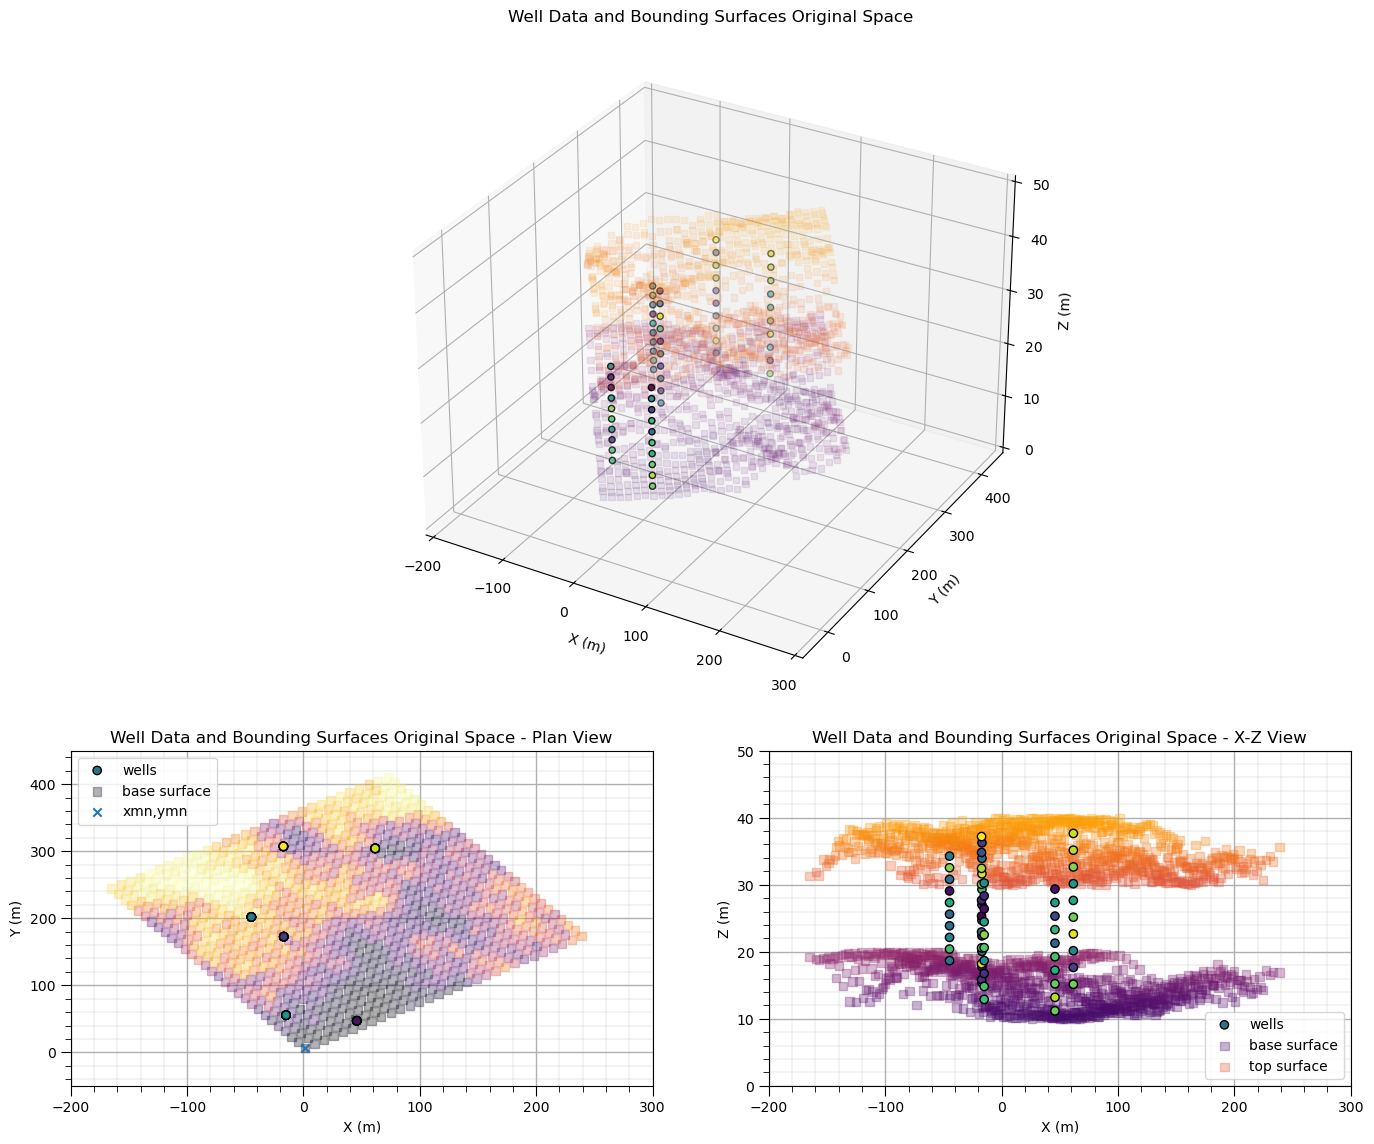

In [4]:
ndx = 30; ndy = 30; ndz = 10; xdsiz = 10.0; ydsiz = 10.0; zdsiz = 1.0 # specify the pre-rotated and transformed grid for the bounding surfaces
xdmn = xdsiz*0.5; ydmn = ydsiz*0.5; zdmn = zdsiz*0.5

nug = 0.0; nst = 1                                            # variogram parameters for the bounding surfaces
it1 = 1; cc1 = 1.0; azi_maj = 0.0; hmaj1 = 800.0; hmin1 = 800.0; hvert1 = 4.0

vario_Vsh = geostats.make_variogram3D(nug,nst,it1,cc1,azi_maj,0.0,hmaj1,hmin1,hvert1) # make variogram model object

npadding = max(int(vario_Vsh['hmaj'][0]/ydsiz),int(vario_Vsh['hmaj'][0]/xdsiz)) # padding for convolution

xdmin = xdmn - xdsiz/2; xdmax = xdmin + ndx * xdsiz           # calculate the bounding surfaces extents
ydmin = ydmn - ydsiz/2; ydmax = ydmin + ndy * ydsiz
zdmin = zdmn - zdsiz/2; zdmax = zdmin + ndz * zdsiz

nwell = 6                                                     # select number of wells, random locations

wellx = np.random.uniform(xdmin,xdmax,size=nwell); welly = np.random.uniform(ydmin,ydmax,size = nwell) # calculate well locations
wellsx = np.zeros(nwell*ndz); wellsy = np.zeros(nwell*ndz); wellsz = np.zeros(nwell*ndz); wellsvsh = np.zeros(nwell*ndz) # well 1D arrays

index = 0                                                     # populate the wells with random values 
for iwell in range(0,nwell):
    for iz in range(0,ndz):
        wellsx[index] = wellx[iwell]; wellsy[index] = welly[iwell]; wellsvsh[index] = np.random.uniform(0.0,1.0)  
        wellsz[index] = zdmn + iz * zdsiz
        index = index + 1

dfwell = pd.DataFrame(np.c_[wellsx,wellsy,wellsz,wellsvsh], columns=["X","Y","Z","Vsh"]) # make well DataFrame

nkx = int(vario_Vsh['hmaj'][0]*2/xdsiz)+1                     # make convolution kernel  
nky = int(vario_Vsh['hmaj'][0]*2/ydsiz)+1

ckx = nkx/2; cky = nky/2                                      # calculate kernel center
kernel = np.zeros((nky,nkx)); geo_dist = np.zeros((nky,nkx))  # allocate kernel matrices

for iy in range(0,nky):                                       # calculate binary kernel
    for ix in range(0,nkx):
        geo_dist[iy,ix] = ( (ix-ckx)*xdsiz/vario_Vsh['hmaj'][0])**2 + ( (iy-cky)*xdsiz/vario_Vsh['hmaj'][0])**2           

kernel[geo_dist < 1.0] = 1.0
kernel = kernel / np.sum(kernel.flatten()) # unbiasedness, sum to 1.0

top = np.random.random(size=(ndy+npadding*2,ndx+npadding*2))
top = ndimage.convolve(top, kernel, mode='constant', cval=0.5) # convolve and then transform to U[0,1] 
top = np.reshape(stats.rankdata(top[npadding:-npadding,npadding:-npadding], "average") / (ndy*ndx),(ndy,ndx))
top = top*10.0 + 30                                           # shift and stretch top surface

base = np.random.random(size=(ndy+npadding*2,ndx+npadding*2))
base = ndimage.convolve(base, kernel, mode='constant', cval=0.5) # convolve and then transform to U[0,1] 
base = np.reshape(stats.rankdata(base[npadding:-npadding,npadding:-npadding], "average") / (ndy*ndx),(ndy,ndx))
base = base*10.0 + 10                                         # shift and stretch base surface

idx = np.arange(ndx)*xdsiz + xdmn; idy = np.arange(ndy)*ydsiz + ydmn; # make indices for fast p-field simulation
idy_2D, idx_2D = np.meshgrid(idy, idx, indexing='ij')         # x and y coordinates at all bounding surface cell centers

dftop = pd.DataFrame(np.c_[idx_2D.flatten(),idy_2D.flatten(),top.flatten()], columns=["X","Y","Top"]) # make bounding surface DataFrames
dfbase = pd.DataFrame(np.c_[idx_2D.flatten(),idy_2D.flatten(),base.flatten()], columns=["X","Y","Base"])

rotation = 35                                                 # rotation angle

dfwell['X'],dfwell['Y'] = geostats.rotate2D(dfwell['X'],dfwell['Y'],rotation) # rotate well data and bounding surfaces
dftop['X'],dftop['Y'] = geostats.rotate2D(dftop['X'],dftop['Y'],rotation)
dfbase['X'],dfbase['Y'] = geostats.rotate2D(dfbase['X'],dfbase['Y'],rotation)

well_sz = np.zeros(nwell*ndz)                                 # put data in original z coordinate between bounding surfaces

index = 0
for iwell in range(0,nwell):
    ix = geostats.getindex(ndx,xdmn,xdsiz,wellx[iwell])
    iy = geostats.getindex(ndy,ydmn,ydsiz,welly[iwell])
    top_well = top[iy,ix]
    base_well = base[iy,ix]
    for iz in range(0,ndz):
        well_sz[index] = (zdmn + iz * zdsiz)/(ndz * zdsiz) * (top_well - base_well) + base_well
        index = index + 1

dfwell['Z'] = well_sz

fig = plt.figure()                                            # plot original data orthonormal 
grid = fig.add_gridspec(2, 2, height_ratios=[2, 1])           # top figure larger

ax = fig.add_subplot(grid[0, :],projection='3d')
ax.scatter(dfbase["X"],dfbase["Y"],dfbase["Base"],c=dfbase['Base'],marker='s',cmap=cmap,alpha=0.1,zorder=1,vmin=0,vmax=50)
ax.scatter(dftop["X"],dftop["Y"],dftop["Top"],c=dftop['Top'],marker='s',cmap=cmap,alpha=0.1,zorder=1,vmin=0,vmax=50)
ax.scatter(dfwell["X"],dfwell["Y"],dfwell["Z"],c=dfwell['Vsh'],edgecolor='black',zorder=100)
ax.set_xlim(-200,300); ax.set_ylim(-50,450); ax.set_zlim(0,50)
ax.set_xlabel('X (m)'); ax.set_ylabel('Y (m)'); ax.set_zlabel('Z (m)'); ax.set_title('Well Data and Bounding Surfaces Original Space')

ax2 = fig.add_subplot(grid[1, 0])                              # plot original data map view
ax2.scatter(dfwell["X"],dfwell["Y"],c=dfwell['Vsh'],edgecolor='black',zorder=100,label='wells')
ax2.scatter(dfbase["X"],dfbase["Y"],c=dfbase['Base'],marker='s',alpha=0.3,zorder=1,cmap=cmap,label='base surface')
xorig = dftop['X'][0]; yorig = dftop['Y'][0]
ax2.set_xlabel('X (m)'); ax2.set_ylabel('Y (m)'); ax2.set_ylim([-50,450]); ax2.set_xlim([-200,300])
ax2.scatter(xorig,yorig,marker='x',label='xmn,ymn'); ax2.legend(loc='upper left'); add_grid2()
ax2.set_title('Well Data and Bounding Surfaces Original Space - Plan View')
                                 
ax3 = fig.add_subplot(grid[1, 1])                               # plot original data x-z view
ax3.scatter(dfwell["X"],dfwell["Z"],c=dfwell['Vsh'],edgecolor='black',zorder=100,label='wells')
ax3.scatter(dfbase["X"],dfbase["Base"],c=dfbase['Base'],marker='s',alpha=0.3,zorder=1,cmap=cmap,vmin=0,vmax=50,label='base surface')
ax3.scatter(dftop["X"],dftop["Top"],c=dftop['Top'],marker='s',alpha=0.3,zorder=1,cmap=cmap,vmin=0,vmax=50,label='top surface')
ax3.set_xlabel('X (m)'); ax3.set_ylabel('Z (m)'); ax3.legend(loc='lower right'); ax3.set_ylim([0,50]); ax3.set_xlim([-200,300]); add_grid2()
ax3.set_title('Well Data and Bounding Surfaces Original Space - X-Z View')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.1); plt.show() 

#### Forward Transform of Coordinates

**Forward transform of coordinates from original data space to model space**: prior to spatial modeling we project data (drill holes or wells) and bounding surfaces to align with axes and flattened coordinates of the model space.

* for this simple example, we assume that the area of interest includes the entire bounding surface grid. So we need to know the areal grid parameters from the bounding surfaces.

* then we just need to assign a reasonable number of cells in the $z$ direction, nz. Note in the flattened space we will assume the zmin is 0.0 and the zmax is nz * zsiz. Note, zmax and zsiz are arbitrary as we are actually using a proportional position with 0.0 as the base surface and 1.0 at the top surface.

* often the model area of interest does not allign with the bounding surfaces, including the origin, number of cells, size of cells and orientation. In this case, the bounding surface will be interpolated to the model grid cells.

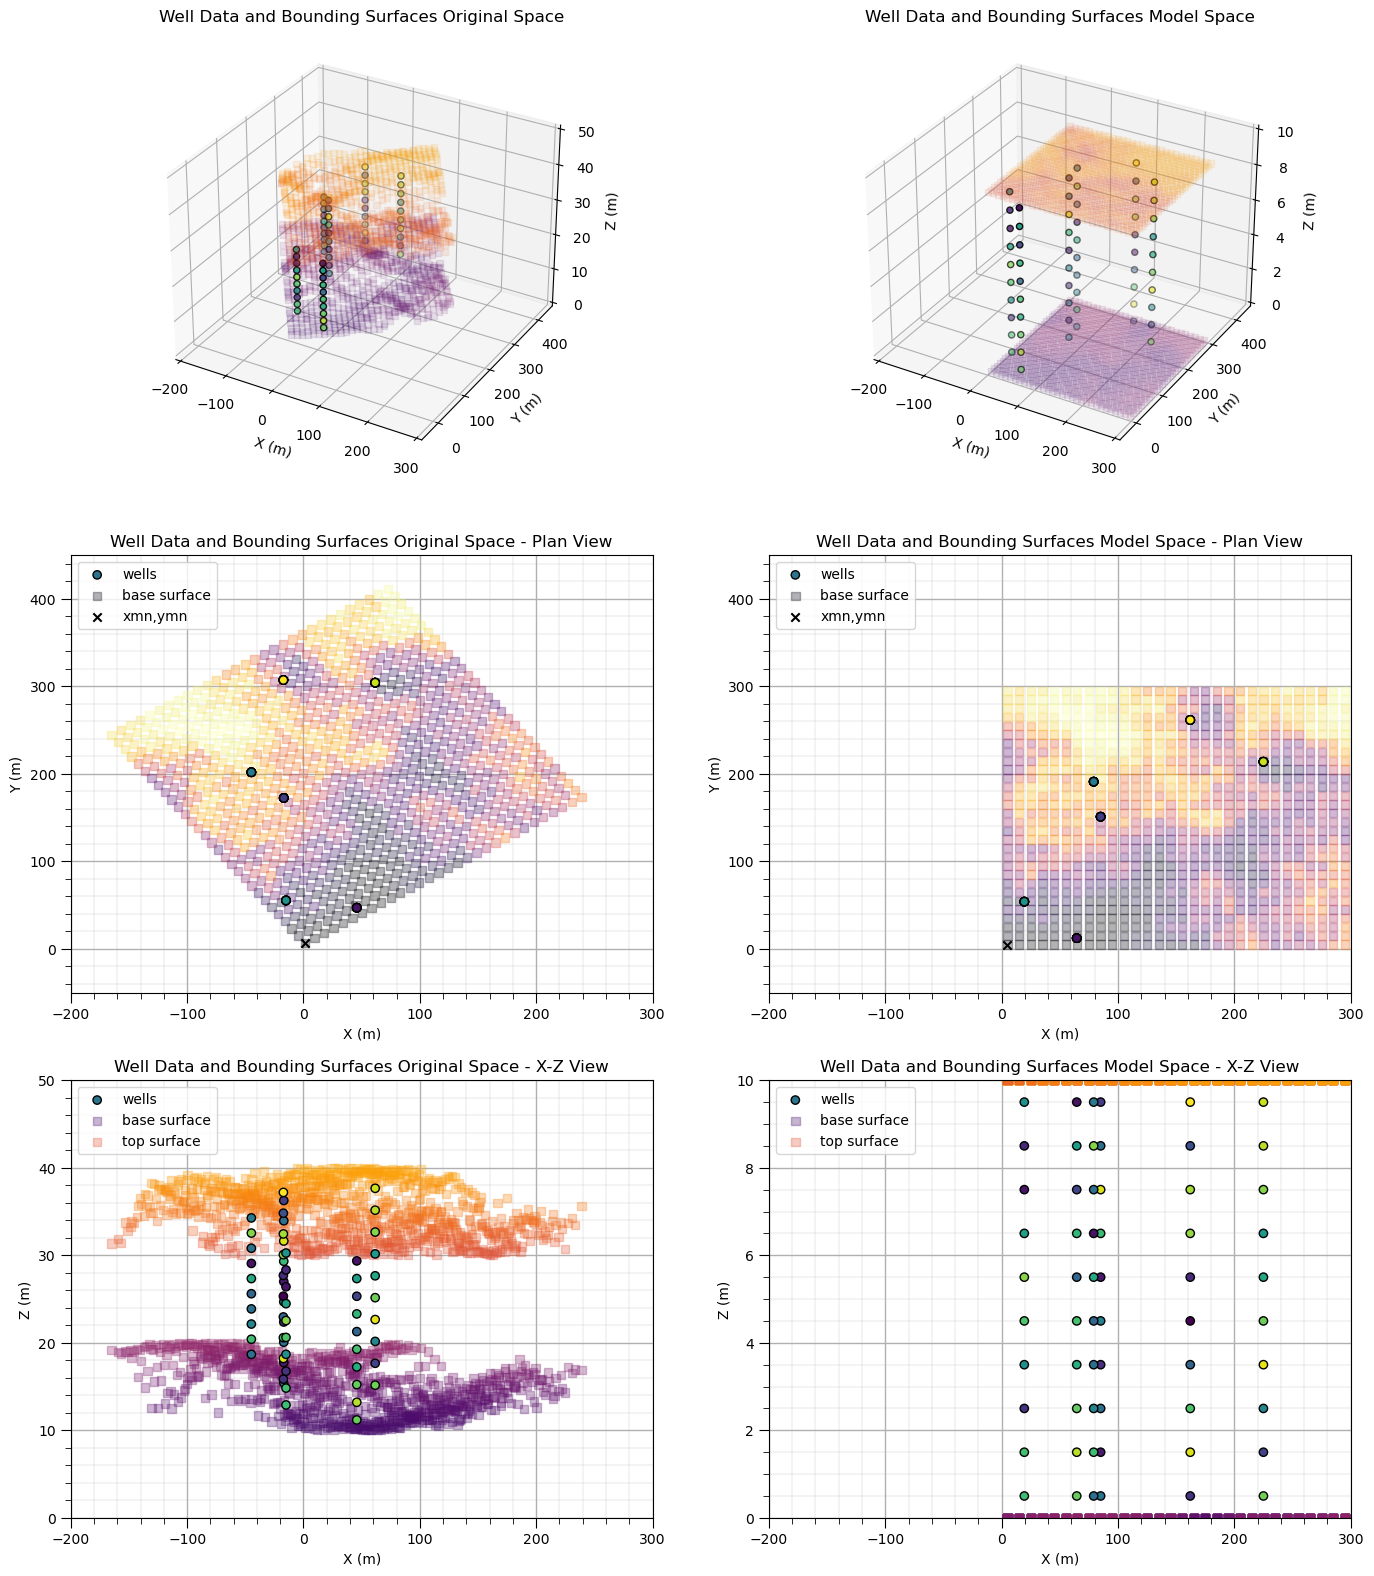

In [5]:
nx = 30; ny = 30; nz = 10;                                    # specify model grid

xsiz = 10.0; ysiz = 10.0; zsiz = 1.0
rotation = -35.0

xmn = xsiz*0.5; ymn = ysiz*0.5; zmn = zsiz*0.5                # given choice to set origin at x = 0, y = 0, z = 0, we calculate the grid origin / limits
xmin = xdmn - xsiz/2; xmax = xmin + nx * xsiz 
ymin = ydmn - ysiz/2; ymax = ymin + ny * ysiz
zmin = zdmn - zsiz/2; zmax = zmin + nz * zsiz

dfwell['Xs'],dfwell['Ys'] = geostats.rotate2D(dfwell['X'],dfwell['Y'],rotation) # rotate the data and bounding surfaces to align with the x and y axes
dftop['Xs'],dftop['Ys'] = geostats.rotate2D(dftop['X'],dftop['Y'],rotation)
dfbase['Xs'],dfbase['Ys'] = geostats.rotate2D(dfbase['X'],dfbase['Y'],rotation)

corx = np.min(dfbase["Xs"].values) - xmn; cory = np.min(dfbase["Ys"].values) - ymn # shift the lower, left grid corner to x = 0, y = 0
dfwell['Xs'] = dfwell['Xs'] - corx; dfwell['Ys'] = dfwell['Ys'] - cory
dftop['Xs'] = dftop['Xs'] - corx; dftop['Ys'] = dftop['Ys'] - cory
dfbase['Xs'] = dfbase['Xs'] - corx; dfbase['Ys'] = dfbase['Ys'] - cory

dfwell['Zf'] = geostats.flatten(top,base,nx,xmn,xsiz,ny,ymn,ysiz,zmin,zmax,dfwell,'Xs','Ys','Z') # flatten the z coordinate, proportional correlation

fig = plt.figure()                                            # plot original data in 3D 
ax = fig.add_subplot(321, projection='3d')
ax.scatter(dfbase["X"],dfbase["Y"],dfbase["Base"],c=dfbase['Base'],marker='s',cmap=cmap,alpha=0.1,zorder=1,vmin=0,vmax=50)
ax.scatter(dftop["X"],dftop["Y"],dftop["Top"],c=dftop['Top'],marker='s',cmap=cmap,alpha=0.1,zorder=1,vmin=0,vmax=50)
ax.scatter(dfwell["X"],dfwell["Y"],dfwell["Z"],c=dfwell['Vsh'],edgecolor='black',zorder=100)
ax.set_xlim(-200,300); ax.set_ylim(-50,450); ax.set_zlim(0,50)
ax.set_xlabel('X (m)'); ax.set_ylabel('Y (m)'); ax.set_zlabel('Z (m)'); ax.set_title('Well Data and Bounding Surfaces Original Space')

ax2 = fig.add_subplot(323)                                    # plot original data map view
ax2.scatter(dfwell["X"],dfwell["Y"],c=dfwell['Vsh'],edgecolor='black',zorder=100,label='wells')
ax2.scatter(dfbase["X"],dfbase["Y"],c=dfbase['Base'],marker='s',alpha=0.3,zorder=1,cmap=cmap,label='base surface')
xorig = dftop['X'][0]; yorig = dftop['Y'][0]
ax2.set_xlabel('X (m)'); ax2.set_ylabel('Y (m)'); ax2.set_ylim([-50,450]); ax2.set_xlim([-200,300])
ax2.scatter(xorig,yorig,marker='x',color='black',label='xmn,ymn'); ax2.legend(loc='upper left'); add_grid2()
ax2.set_title('Well Data and Bounding Surfaces Original Space - Plan View')

ax3 = fig.add_subplot(325)                                    # plot original data x-z view
ax3.scatter(dfwell["X"],dfwell["Z"],c=dfwell['Vsh'],edgecolor='black',zorder=100,label='wells')
ax3.scatter(dfbase["X"],dfbase["Base"],c=dfbase['Base'],marker='s',alpha=0.3,zorder=1,cmap=cmap,vmin=0,vmax=50,label='base surface')
ax3.scatter(dftop["X"],dftop["Top"],c=dftop['Top'],marker='s',alpha=0.3,zorder=1,cmap=cmap,vmin=0,vmax=50,label='top surface')
ax3.set_xlabel('X (m)'); ax3.set_ylabel('Z (m)'); ax3.legend(loc='upper left'); ax3.set_ylim([0,50]); ax3.set_xlim([-200,300]); add_grid2()
ax3.set_title('Well Data and Bounding Surfaces Original Space - X-Z View')

ax4 = fig.add_subplot(322, projection='3d')                   # plot original data orthonormal
ax4.scatter(dfbase["Xs"],dfbase["Ys"],np.full((nx*ny),zmin),c=dfbase['Base'],marker='s',cmap=cmap,alpha=0.1,zorder=1,vmin=0,vmax=50)
ax4.scatter(dftop["Xs"],dftop["Ys"],np.full((nx*ny),zmax),c=dftop['Top'],marker='s',cmap=cmap,alpha=0.1,zorder=1,vmin=0,vmax=50)
ax4.scatter(dfwell["Xs"],dfwell["Ys"],dfwell["Zf"],c=dfwell['Vsh'],edgecolor='black',zorder=100)
ax4.set_xlim(-200,300); ax4.set_ylim(-50,450); ax4.set_zlim(0,10)
ax4.set_xlabel('X (m)'); ax4.set_ylabel('Y (m)'); ax4.set_zlabel('Z (m)'); ax4.set_title('Well Data and Bounding Surfaces Model Space')

ax5 = fig.add_subplot(324)                                     # plot original data map view
ax5.scatter(dfwell["Xs"],dfwell["Ys"],c=dfwell['Vsh'],edgecolor='black',zorder=100,label='wells')
ax5.scatter(dfbase["Xs"],dfbase["Ys"],c=dfbase['Base'],marker='s',alpha=0.3,zorder=1,cmap=cmap,label='base surface')
xorig = dftop['Xs'][0]; yorig = dftop['Ys'][0]
ax5.set_xlabel('X (m)'); ax5.set_ylabel('Y (m)'); ax5.set_ylim([-50,450]); ax5.set_xlim([-200,300])
ax5.scatter(xorig,yorig,marker='x',color='black',label='xmn,ymn'); ax5.legend(loc='upper left'); add_grid2()
ax5.set_title('Well Data and Bounding Surfaces Model Space - Plan View')

ax6 = fig.add_subplot(326)                                     # plot original data x-z view
ax6.scatter(dfwell["Xs"],dfwell["Zf"],c=dfwell['Vsh'],edgecolor='black',zorder=100,label='wells')
ax6.scatter(dfbase["Xs"],np.full((nx*ny),zmin),c=dfbase['Base'],marker='s',alpha=0.3,zorder=1,cmap=cmap,vmin=0,vmax=50,label='base surface')
ax6.scatter(dftop["Xs"],np.full((nx*ny),zmax),c=dftop['Top'],marker='s',alpha=0.3,zorder=1,cmap=cmap,vmin=0,vmax=50,label='top surface')
ax6.set_xlabel('X (m)'); ax6.set_ylabel('Z (m)'); ax6.legend(loc='upper left'); ax6.set_ylim([0,10]); ax6.set_xlim([-200,300]); add_grid2()
ax6.set_title('Well Data and Bounding Surfaces Model Space - X-Z View')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.1, wspace=0.2, hspace=0.2); plt.show() 

#### Back Transform of Coordinates

**Back transform of coordinates from model space to original data space**: this is back transformation of project data and bounding surfaces, and most importantly, the new model, from the aligned with axes and flattened coordinates to original data space

* I demonstrate the data and bounding surfaces back projection for completeness, but in typical geostatistical modeling workflows, only the geostatistical models on the grids within the area of interest are back transformed to original space.

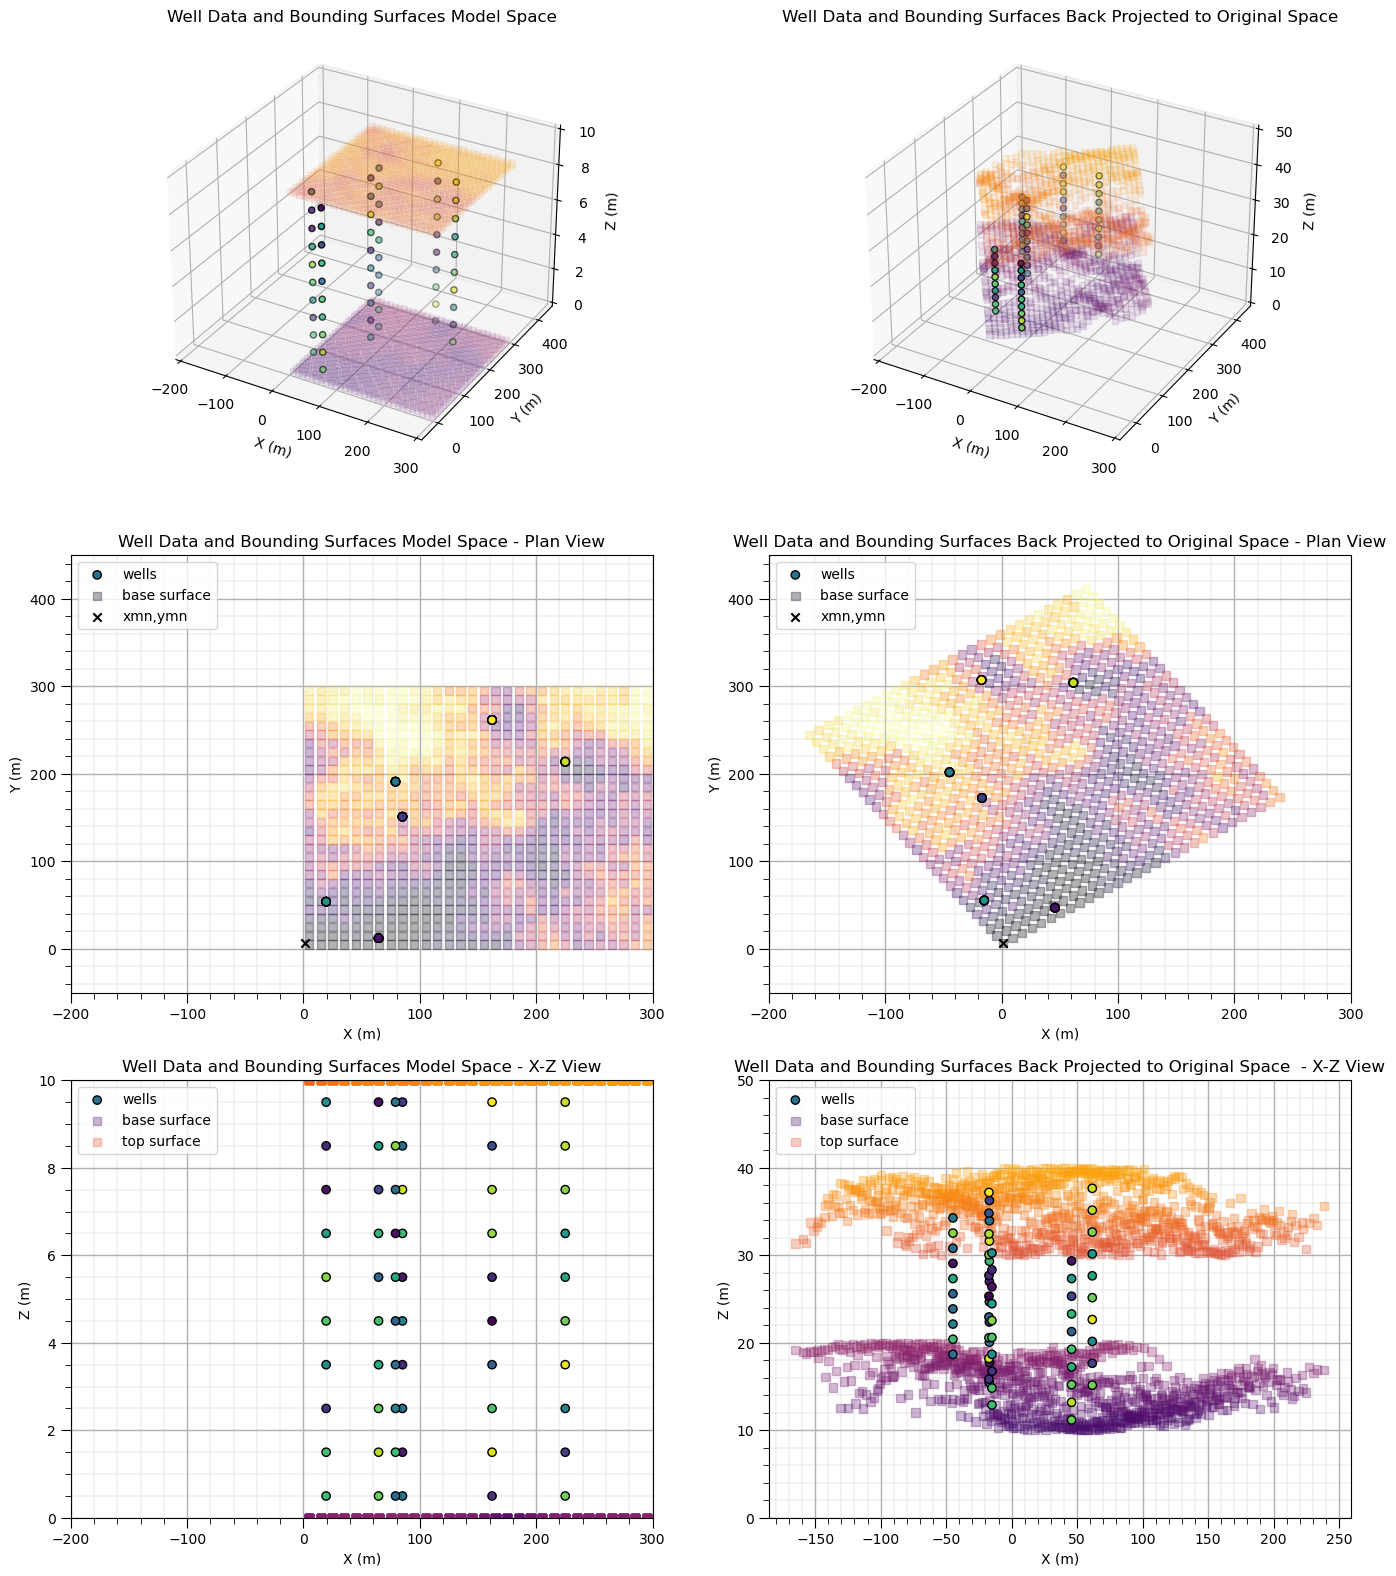

In [6]:
dfwell['Z_back'] = geostats.unflatten(top,base,nx,xmn,xsiz,ny,ymn,ysiz,zmin,zmax,dfwell,'Xs','Ys','Zf') # unflatten z

dfwell['X_back'],dfwell['Y_back'] = geostats.rotate2D(dfwell['Xs'],dfwell['Ys'],-1*rotation) # rotate the data and surfaces to align to x and y
dftop['X_back'],dftop['Y_back'] = geostats.rotate2D(dftop['Xs'],dftop['Ys'],-1*rotation)
dfbase['X_back'],dfbase['Y_back'] = geostats.rotate2D(dfbase['Xs'],dfbase['Ys'],-1*rotation)

dfwell['X_back'] = dfwell['X_back'] + corx; dfwell['Y_back'] = dfwell['Y_back'] + cory # shift the lower, left grid corner to the original origin
dftop['X_back'] = dftop['X_back'] + corx; dftop['Y_back'] = dftop['Y_back'] + cory
dfbase['X_back'] = dfbase['X_back'] + corx; dfbase['Y_back'] = dfbase['Y_back'] + cory

fig = plt.figure()                                            # plot original data orthonormal 

ax = fig.add_subplot(321, projection='3d')                   # plot original data orthonormal
ax.scatter(dfbase["Xs"],dfbase["Ys"],np.full((nx*ny),zmin),c=dfbase['Base'],marker='s',cmap=cmap,alpha=0.1,zorder=1,vmin=0,vmax=50)
ax.scatter(dftop["Xs"],dftop["Ys"],np.full((nx*ny),zmax),c=dftop['Top'],marker='s',cmap=cmap,alpha=0.1,zorder=1,vmin=0,vmax=50)
ax.scatter(dfwell["Xs"],dfwell["Ys"],dfwell["Zf"],c=dfwell['Vsh'],edgecolor='black',zorder=100)
ax.set_xlim(-200,300); ax.set_ylim(-50,450); ax.set_zlim(0,10)
ax.set_xlabel('X (m)'); ax.set_ylabel('Y (m)'); ax.set_zlabel('Z (m)'); ax.set_title('Well Data and Bounding Surfaces Model Space')

ax2 = fig.add_subplot(323)                                     # plot original data map view
ax2.scatter(dfwell["Xs"],dfwell["Ys"],c=dfwell['Vsh'],edgecolor='black',zorder=100,label='wells')
ax2.scatter(dfbase["Xs"],dfbase["Ys"],c=dfbase['Base'],marker='s',alpha=0.3,zorder=1,cmap=cmap,label='base surface')
xorig = dftop['X'][0]; yorig = dftop['Y'][0]
ax2.set_xlabel('X (m)'); ax2.set_ylabel('Y (m)'); ax2.set_ylim([-50,450]); ax2.set_xlim([-200,300])
ax2.scatter(xorig,yorig,marker='x',color='black',label='xmn,ymn'); ax2.legend(loc='upper left'); add_grid2()
ax2.set_title('Well Data and Bounding Surfaces Model Space - Plan View')

ax3 = fig.add_subplot(325)                                     # plot original data x-z view
ax3.scatter(dfwell["Xs"],dfwell["Zf"],c=dfwell['Vsh'],edgecolor='black',zorder=100,label='wells')
ax3.scatter(dfbase["Xs"],np.full((nx*ny),zmin),c=dfbase['Base'],marker='s',alpha=0.3,zorder=1,cmap=cmap,vmin=0,vmax=50,label='base surface')
ax3.scatter(dftop["Xs"],np.full((nx*ny),zmax),c=dftop['Top'],marker='s',alpha=0.3,zorder=1,cmap=cmap,vmin=0,vmax=50,label='top surface')
ax3.set_xlabel('X (m)'); ax3.set_ylabel('Z (m)'); ax3.legend(loc='upper left'); ax3.set_ylim([0,10]); ax3.set_xlim([-200,300]); add_grid2()
ax3.set_title('Well Data and Bounding Surfaces Model Space - X-Z View')

ax4 = fig.add_subplot(322, projection='3d')
ax4.scatter(dfbase["X"],dfbase["Y"],dfbase["Base"],c=dfbase['Base'],marker='s',cmap=cmap,alpha=0.1,zorder=1,vmin=0,vmax=50)
ax4.scatter(dftop["X"],dftop["Y"],dftop["Top"],c=dftop['Top'],marker='s',cmap=cmap,alpha=0.1,zorder=1,vmin=0,vmax=50)
ax4.scatter(dfwell["X"],dfwell["Y"],dfwell["Z"],c=dfwell['Vsh'],edgecolor='black',zorder=100)
ax4.set_xlim(-200,300); ax4.set_ylim(-50,450); ax4.set_zlim(0,50)
ax4.set_xlabel('X (m)'); ax4.set_ylabel('Y (m)'); ax4.set_zlabel('Z (m)')
ax4.set_title('Well Data and Bounding Surfaces Back Projected to Original Space')

ax5 = fig.add_subplot(324)                                    # plot original data map view
ax5.scatter(dfwell["X"],dfwell["Y"],c=dfwell['Vsh'],edgecolor='black',zorder=100,label='wells')
ax5.scatter(dfbase["X"],dfbase["Y"],c=dfbase['Base'],marker='s',alpha=0.3,zorder=1,cmap=cmap,label='base surface')
xorig = dftop['X'][0]; yorig = dftop['Y'][0]
ax5.set_xlabel('X (m)'); ax5.set_ylabel('Y (m)'); ax5.set_ylim([-50,450]); ax5.set_xlim([-200,300])
ax5.scatter(xorig,yorig,marker='x',color='black',label='xmn,ymn'); ax5.legend(loc='upper left'); add_grid2()
ax5.set_title('Well Data and Bounding Surfaces Back Projected to Original Space - Plan View')

ax6 = fig.add_subplot(326)                                    # plot original data x-z view
ax6.scatter(dfwell["X"],dfwell["Z"],c=dfwell['Vsh'],edgecolor='black',zorder=100,label='wells')
ax6.scatter(dfbase["X"],dfbase["Base"],c=dfbase['Base'],marker='s',alpha=0.3,zorder=1,cmap=cmap,vmin=0,vmax=50,label='base surface')
ax6.scatter(dftop["X"],dftop["Top"],c=dftop['Top'],marker='s',alpha=0.3,zorder=1,cmap=cmap,vmin=0,vmax=50,label='top surface')
ax6.set_xlabel('X (m)'); ax6.set_ylabel('Z (m)'); ax6.legend(loc='upper left'); ax6.set_ylim([0,50]); ax3.set_xlim([-200,300]); add_grid2()
ax6.set_title('Well Data and Bounding Surfaces Back Projected to Original Space  - X-Z View')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.1, wspace=0.2, hspace=0.2); plt.show() 

#### Comments

This was a basic demonstration of coordinate transformations, forward and back projection from original space to the axes aligned, flattened model space and back. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main).

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)